In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append('/workspace/gan/3D-FM-GAN/')
from PIL import Image
# os.chdir('/workspace/gan/3D-FM-GAN/models')
# os.getcwd()

In [5]:
import torch
import torch.nn as nn
from model.dataset import ReconDataset, DisentangleDataset
from torch.utils.data import DataLoader

# Recon-FFHQ

In [6]:
root = '/workspace/gan/3D-FM-GAN/data'
rds = ReconDataset(root=root, sub_dir='ffhq', random_flip=True)

In [8]:
rds[0]['r1']

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

In [5]:
from utils import tensor2im

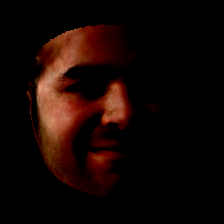

In [6]:
Image.fromarray(tensor2im(rds[0]['r1']))

In [7]:
rdl = DataLoader(rds, batch_size=32, shuffle=True, num_workers=16, pin_memory=True)

In [8]:
for data in rdl:
  print(data['r1'].shape)
  print(data['p1'].shape)
  break

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


# Recon - Syn

# Disen

In [44]:
root = '/workspace/gan/3D-FM-GAN/data'
dds = DisentangleDataset(root=root, sub_dir='syn_data', crop=False, random_flip=True)

In [45]:
dds.img_m_list[:10]

[PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00000_0_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00000_1_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00000_2_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00000_3_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00000_4_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00000_5_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00000_6_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00001_0_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00001_1_m.png'),
 PosixPath('/workspace/gan/3D-FM-GAN/data/syn_data/mask/00001_2_m.png')]

Text(0.5, 1.0, 'mask')

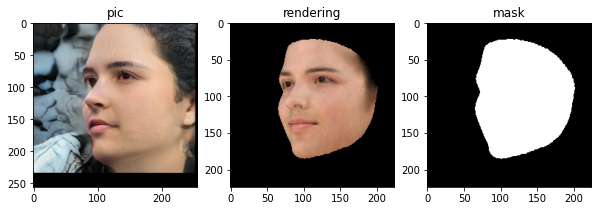

In [61]:
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt


instance = dds[0][0]

plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(to_pil_image(instance['p_img']), cmap='gray')
plt.title('pic')
plt.subplot(1,3,2)
plt.imshow(to_pil_image(instance['r_img']), cmap='gray')
plt.title('rendering')
plt.subplot(1,3,3)
plt.imshow(to_pil_image(instance['m_img']), cmap='gray')
plt.title('mask')

Text(0.5, 1.0, 'mask')

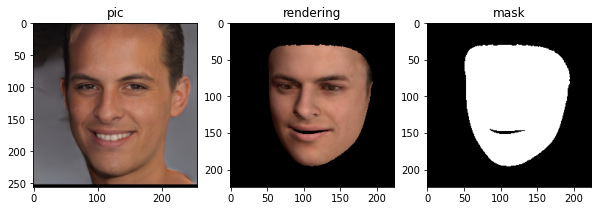

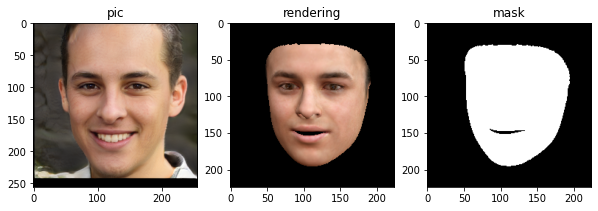

In [71]:
instance = dds[4]
first = instance[0]
second = instance[1]

plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(to_pil_image(first['p_img']), cmap='gray')
plt.title('pic')
plt.subplot(1,3,2)
plt.imshow(to_pil_image(first['r_img']), cmap='gray')
plt.title('rendering')
plt.subplot(1,3,3)
plt.imshow(to_pil_image(first['m_img']), cmap='gray')
plt.title('mask')


plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(to_pil_image(second['p_img']), cmap='gray')
plt.title('pic')
plt.subplot(1,3,2)
plt.imshow(to_pil_image(second['r_img']), cmap='gray')
plt.title('rendering')
plt.subplot(1,3,3)
plt.imshow(to_pil_image(second['m_img']), cmap='gray')
plt.title('mask')

In [47]:
dds[0][0]

{'p_img': tensor([[[0.3725, 0.4235, 0.3961,  ..., 0.2745, 0.2588, 0.3294],
          [0.4353, 0.3882, 0.3843,  ..., 0.2824, 0.3020, 0.3137],
          [0.4196, 0.3961, 0.3922,  ..., 0.3255, 0.3490, 0.3216],
          ...,
          [0.4392, 0.4510, 0.4392,  ..., 0.4196, 0.4275, 0.3961],
          [0.1804, 0.1961, 0.1608,  ..., 0.0627, 0.0627, 0.1020],
          [0.0157, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0157]],
 
         [[0.4157, 0.4392, 0.4000,  ..., 0.3059, 0.2980, 0.3843],
          [0.4392, 0.3961, 0.3882,  ..., 0.3137, 0.3333, 0.3686],
          [0.4157, 0.4000, 0.3961,  ..., 0.3608, 0.3765, 0.3647],
          ...,
          [0.5412, 0.5490, 0.5137,  ..., 0.4941, 0.4667, 0.4314],
          [0.2157, 0.2353, 0.2000,  ..., 0.0824, 0.0745, 0.1216],
          [0.0196, 0.0118, 0.0118,  ..., 0.0039, 0.0039, 0.0157]],
 
         [[0.4235, 0.4549, 0.3961,  ..., 0.3294, 0.3255, 0.4039],
          [0.4471, 0.4078, 0.3882,  ..., 0.3451, 0.3686, 0.3961],
          [0.4078, 0.4000, 0.39